https://math.stackexchange.com/questions/5071052/what-is-the-probability-distribution-of-the-dft-of-a-real-gaussian-white-noise-r

In [ ]:
from commpy.channels import awgn
import numpy as np
import matplotlib.pyplot as plt
import pyMRI.pymri as pymri
import seaborn as sns

# Exemplo

In [87]:
t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)
sig = np.zeros(2048, dtype=np.complex128)
t = np.arange(t0, tn, dt)

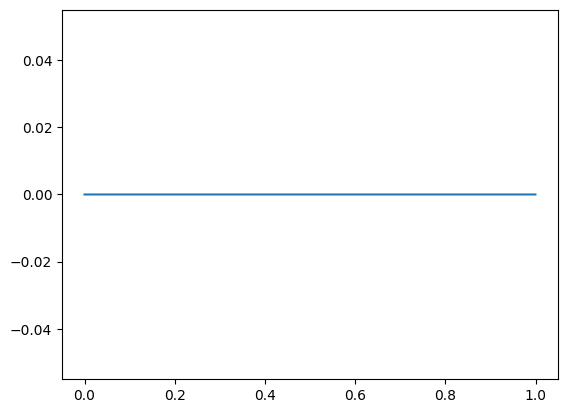

In [88]:
plt.plot(t, np.abs(sig))

In [89]:
SNR = 1.0
loc = 0.0
scale = 0.1

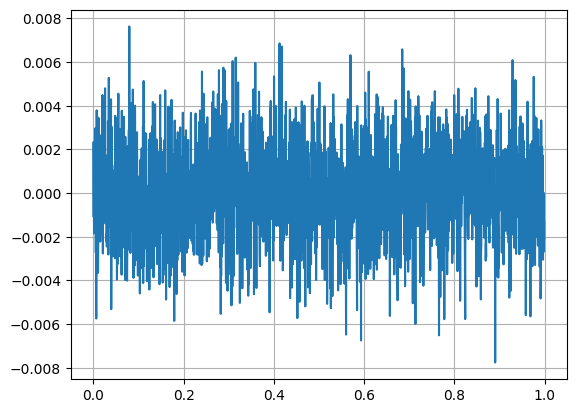

In [97]:
corruption = np.random.normal(loc, scale, sig.size)
c_sig_fft = sig + (corruption + 1j*corruption)
c_sig = np.fft.ifft(np.fft.ifftshift(c_sig_fft))

plt.plot(t, c_sig.imag)
# plt.ylim(-1.0, 1.0)
plt.grid()

In [77]:
L = 0.4
noise_threshold = 30
rcond=1e-15
L_ = int(L*sig.size)

In [78]:
_, z, r = pymri.filter_sig(c_sig, L, noise_threshold, rcond, return_poles_and_res=True)
s0, phi, omega, t2 = pymri.calculate_variables_from_z_and_r(z, r, dt)

In [79]:
s0_sort = np.argsort(s0)
phi_sort = np.argsort(phi)
omega_sort = np.argsort(omega)
t2_sort = np.argsort(t2)

## Ordenação

### Ordenação por $S_0$

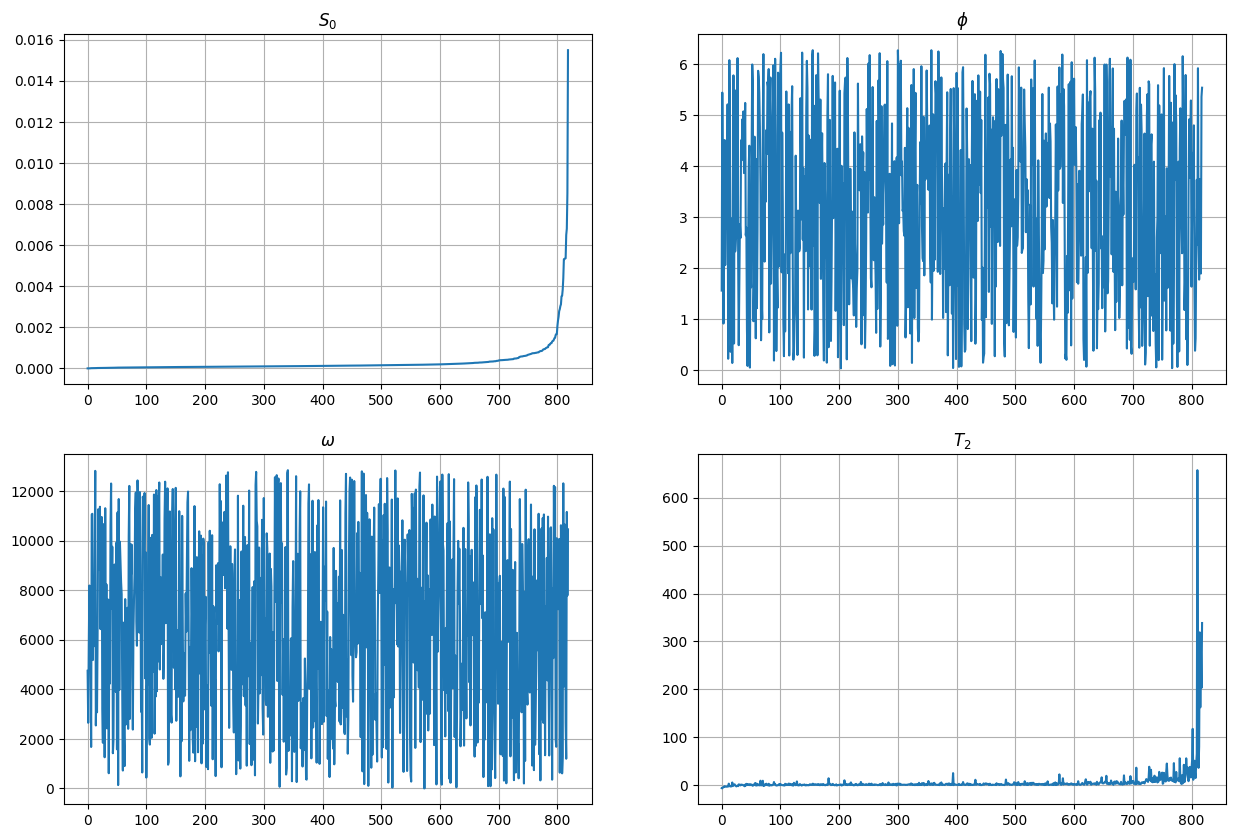

In [80]:
l = np.linspace(0, L_ - 1, L_)

plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(l, s0[s0_sort])
plt.title(r"$S_0$")
plt.grid()

plt.subplot(222)
plt.plot(l, phi[s0_sort])
plt.title(r"$\phi$")
plt.grid()

plt.subplot(223)
plt.plot(l, omega[s0_sort])
plt.title(r"$\omega$")
plt.grid()

plt.subplot(224)
plt.plot(l, t2[s0_sort])
plt.title(r"$T_2$")
plt.grid()

### Ordenação por $\phi$

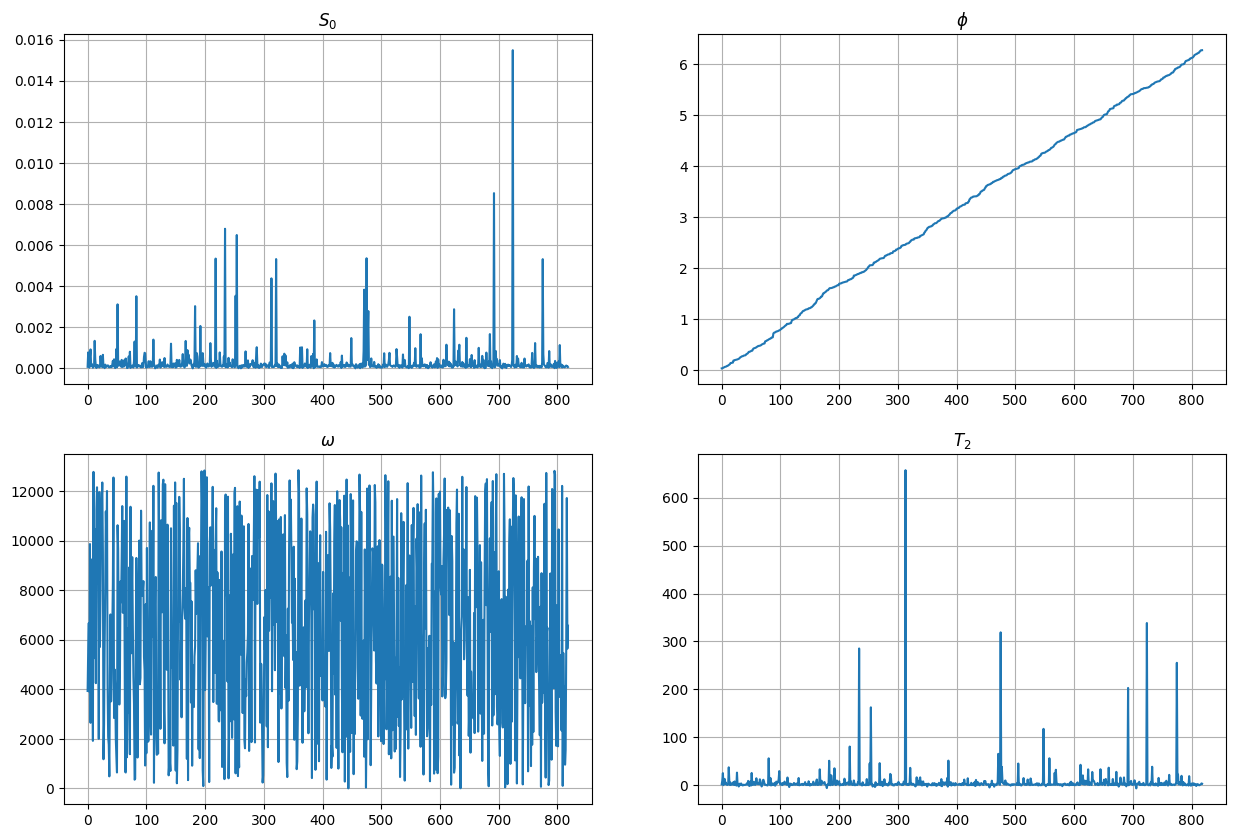

In [81]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(l, s0[phi_sort])
plt.title(r"$S_0$")
plt.grid()

plt.subplot(222)
plt.plot(l, phi[phi_sort])
plt.title(r"$\phi$")
plt.grid()

plt.subplot(223)
plt.plot(l, omega[phi_sort])
plt.title(r"$\omega$")
plt.grid()

plt.subplot(224)
plt.plot(l, t2[phi_sort])
plt.title(r"$T_2$")
plt.grid()

### Ordenação por $\omega$

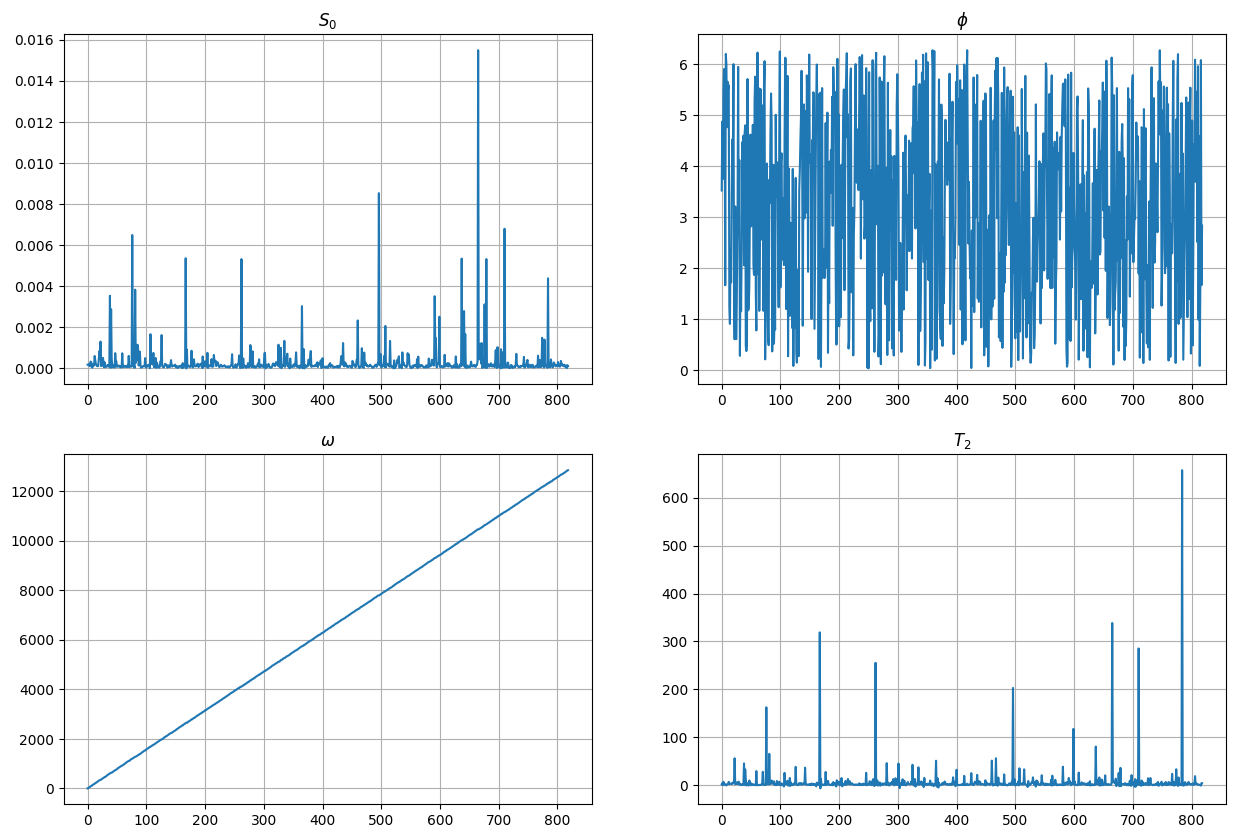

In [82]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(l, s0[omega_sort])
plt.title(r"$S_0$")
plt.grid()

plt.subplot(222)
plt.plot(l, phi[omega_sort])
plt.title(r"$\phi$")
plt.grid()

plt.subplot(223)
plt.plot(l, omega[omega_sort])
plt.title(r"$\omega$")
plt.grid()

plt.subplot(224)
plt.plot(l, t2[omega_sort])
plt.title(r"$T_2$")
plt.grid()

### Ordenação por $T_2$

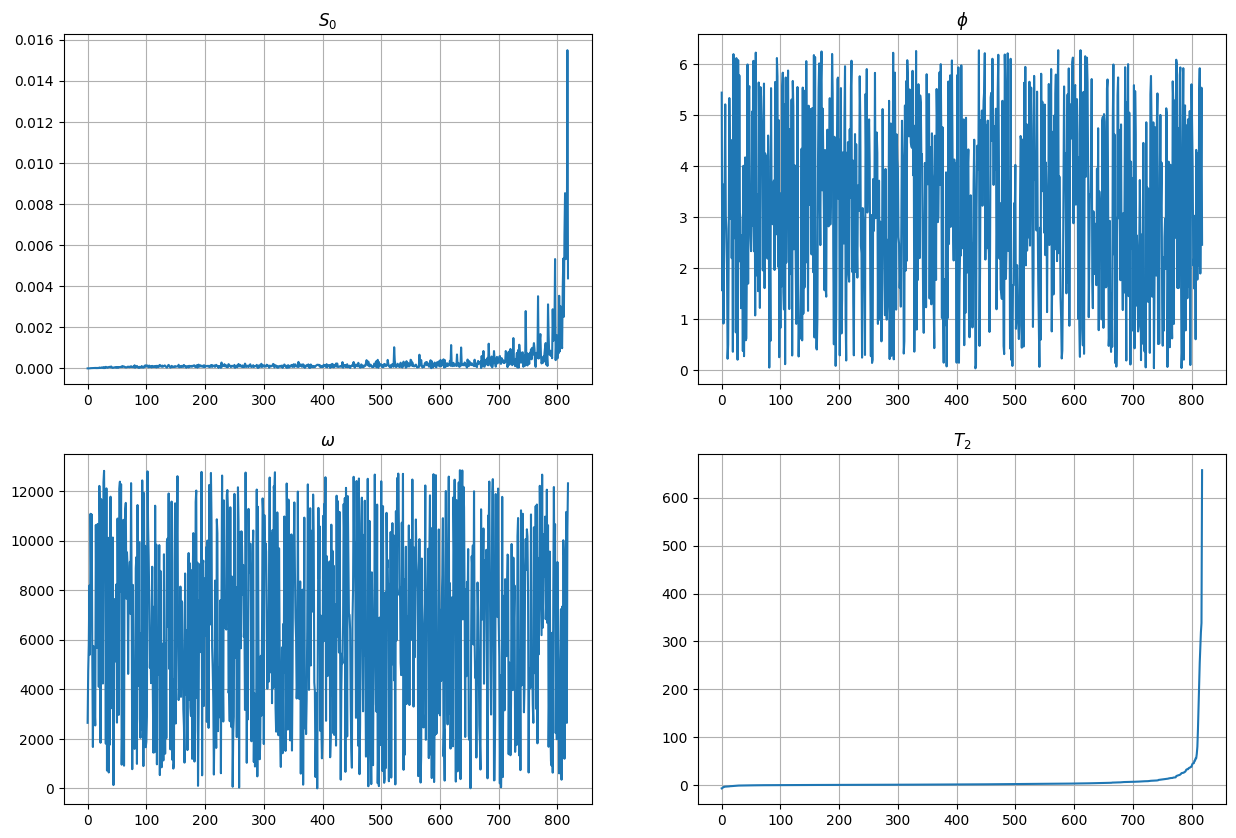

In [83]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(l, s0[t2_sort])
plt.title(r"$S_0$")
plt.grid()

plt.subplot(222)
plt.plot(l, phi[t2_sort])
plt.title(r"$\phi$")
plt.grid()

plt.subplot(223)
plt.plot(l, omega[t2_sort])
plt.title(r"$\omega$")
plt.grid()

plt.subplot(224)
plt.plot(l, t2[t2_sort])
plt.title(r"$T_2$")
plt.grid()

# Estatística

In [99]:
locs = np.arange(-1.0, 1.0 + 0.25, 0.25)
scales = np.arange(-5, 5, 1)
scales = np.power(10.0, scales)
n_avgs = 10
print(locs)
print(scales)

[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


In [103]:
shape = (n_avgs, locs.size, scales.size, L_)
s0s, phis, omegas, t2s = np.zeros(shape), np.zeros(shape), np.zeros(shape), np.zeros(shape)

### Simulação

In [106]:
rerun = True
filename_end = "_1"
folder_name = "files/"
subfolder_name = "noise-mpm/"

In [104]:
for i in range(n_avgs):
    for j in range(locs.size):
        for k in range(scales.size):
                    
            corruption = np.random.normal(locs[j], scales[k], sig.size)
            c_sig_fft = sig + (corruption + 1j*corruption)
            c_sig = np.fft.ifft(np.fft.ifftshift(c_sig_fft))

            _, z, r = pymri.filter_sig(c_sig, L, noise_threshold, rcond, return_poles_and_res=True)
            s0s[i, j, k, :], phis[i, j, k, :], omegas[i, j, k, :], t2s[i, j, k, :] = pymri.calculate_variables_from_z_and_r(z, r, dt)

In [107]:
if rerun == True:
    np.save(folder_name + subfolder_name + "s0s" + filename_end, s0s)
    np.save(folder_name + subfolder_name + "phis" + filename_end, phis)
    np.save(folder_name + subfolder_name + "omegas" + filename_end, omegas)
    np.save(folder_name + subfolder_name + "t2s" + filename_end, t2s)
    np.save(folder_name + subfolder_name + "locs" + filename_end, locs)
    np.save(folder_name + subfolder_name + "scales" + filename_end, locs)

In [ ]:
if rerun == False:
    s0s = np.load(folder_name + subfolder_name + "s0s" + filename_end + ".npy")
    phis = np.load(folder_name + subfolder_name + "phis" + filename_end + ".npy")
    omegas = np.load(folder_name + subfolder_name + "omegas" + filename_end + ".npy")
    t2s = np.load(folder_name + subfolder_name + "t2s" + filename_end + ".npy")
    locs = np.load(folder_name + subfolder_name + "locs" + filename_end + ".npy")
    scales = np.load(folder_name + subfolder_name + "scales" + filename_end + ".npy")

### Processamento

#### Locs

In [ ]:
avg_s0s = np.average(s0s, axis = 0)
avg_phis = np.average(phis, axis = 0)
avg_omegas = np.average(omegas, axis = 0)
avg_t2s = np.average(t2s, axis = 0)

In [ ]:
scales_i = 0

In [ ]:
sns.color_palette("husl", locs.size)

sns.lineplot()

#### Scales